In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder

## MONK 1

In [14]:
path=r'/home/ludovico/ML-project/data/monks-1'
monk1_train = pd.read_csv(path+'.train', header=None, delim_whitespace=True, dtype=str)
monk1_test = pd.read_csv(path+'.test', header=None, delim_whitespace=True, dtype=str)

y_train=monk1_train[0]
x_train=monk1_train[monk1_train.columns[1:-1]]

y_test=monk1_test[0]
x_test=monk1_test[monk1_train.columns[1:-1]]

x_test_not_enc=x_test
x_train_not_enc=x_train

encoder = OneHotEncoder(sparse_output=False)
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)


In [15]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
n_neigh=np.arange(1,50,1)
parameters_KNN = {
    'n_neighbors': n_neigh,
    'weights': ('uniform','distance'),
    'metric':('cosine','minkowski'),
    'p': [1,2,3,5,7]
}        
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
)

grid_search_KNN_2 = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True,
)

In [16]:
KNN_1=grid_search_KNN.fit(x_train, y_train)
KNN_2=grid_search_KNN_2.fit(x_train_not_enc, y_train)

print('encoded',KNN_1.best_params_)
print('not encoded',KNN_2.best_params_) 

best1=KNN_1.best_score_
best2=KNN_2.best_score_

print('Best Score Encoded - Validation:', best1 )
print('Best Score not Encoded- Validation:', best2 )

if best1>best2:
    KNN=KNN_1
else:
    KNN=KNN_2
    x_test=x_test_not_enc

cv_results_df = pd.DataFrame(KNN.cv_results_)
best_model_index=KNN.best_index_

val_acc=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_acc=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]

print('Train accuracy:',train_acc,'+/-', train_std)
print('validation accuracy:',val_acc,'+/-', val_std)

encoded {'metric': 'cosine', 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
not encoded {'metric': 'cosine', 'n_neighbors': 22, 'p': 1, 'weights': 'distance'}
Best Score Encoded - Validation: 0.8079999999999999
Best Score not Encoded- Validation: 0.8371333333333334
Train accuracy: 1.0 +/- 0.0
validation accuracy: 0.8371333333333334 +/- 0.0678536333261201


## Model assessment

Accuracy Score - KNN - Test-error: 0.8055555555555556

 Classification report               precision    recall  f1-score   support

           0       0.81      0.81      0.81       216
           1       0.81      0.81      0.81       216

    accuracy                           0.81       432
   macro avg       0.81      0.81      0.81       432
weighted avg       0.81      0.81      0.81       432



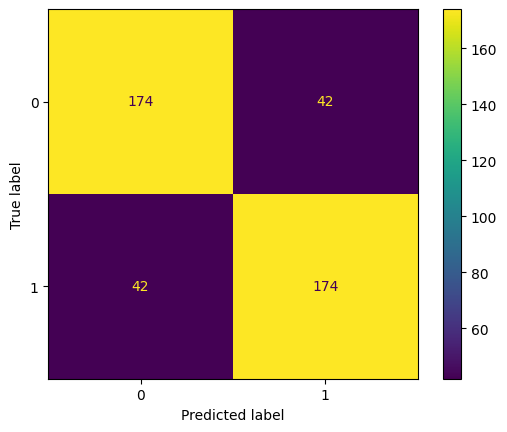

In [17]:
y_pred_KNN =KNN.predict(x_test)

print('Accuracy Score - KNN - Test-error:', metrics.accuracy_score(y_test, y_pred_KNN))  

print('\n Classification report',metrics.classification_report(y_test, y_pred_KNN))

cm = metrics.confusion_matrix(y_test, y_pred_KNN, labels=KNN.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=KNN.classes_)
disp.plot()
plt.show()

## MONK 2

In [18]:
path=r'/home/ludovico/ML-project/data/monks-2'
monk1_train = pd.read_csv(path+'.train', header=None, delim_whitespace=True, dtype=str)
monk1_test = pd.read_csv(path+'.test', header=None, delim_whitespace=True, dtype=str)

y_train=monk1_train[0]
x_train=monk1_train[monk1_train.columns[1:-1]]

y_test=monk1_test[0]
x_test=monk1_test[monk1_train.columns[1:-1]]

x_test_not_enc=x_test
x_train_not_enc=x_train

encoder = OneHotEncoder(sparse_output=False)
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

In [19]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
n_neigh=np.arange(1,50,1)
parameters_KNN = {
    'n_neighbors': n_neigh,
    'weights': ('uniform','distance'),
    'metric':('cosine','minkowski'),
    'p': [1,2,3,5,7]
}         
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True
)

grid_search_KNN_2 = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True
)

In [20]:
KNN_1=grid_search_KNN.fit(x_train, y_train)
KNN_2=grid_search_KNN_2.fit(x_train_not_enc, y_train)

print('encoded',KNN_1.best_params_)
print('not encoded',KNN_2.best_params_) 

best1=KNN_1.best_score_
best2=KNN_2.best_score_

print('Best Score Encoded - Validation:', best1 )
print('Best Score not Encoded- Validation:', best2 )

if best1>best2:
    KNN=KNN_1
else:
    KNN=KNN_2
    x_test=x_test_not_enc

cv_results_df = pd.DataFrame(KNN.cv_results_)
best_model_index=KNN.best_index_

val_acc=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_acc=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]

print('Train accuracy:',train_acc,'+/-', train_std)
print('validation accuracy:',val_acc,'+/-', val_std)

encoded {'metric': 'cosine', 'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}
not encoded {'metric': 'cosine', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best Score Encoded - Validation: 0.6384670231729056
Best Score not Encoded- Validation: 0.7953297682709448
Train accuracy: 1.0 +/- 0.0
validation accuracy: 0.7953297682709448 +/- 0.05768403145787359


## Model assessment

Accuracy Score - KNN - Test-error: 0.8888888888888888

 Classification report               precision    recall  f1-score   support

           0       0.95      0.88      0.91       290
           1       0.79      0.90      0.84       142

    accuracy                           0.89       432
   macro avg       0.87      0.89      0.88       432
weighted avg       0.90      0.89      0.89       432



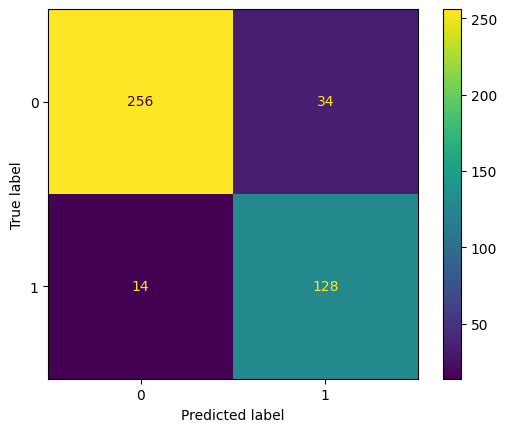

In [21]:
y_pred_KNN =KNN.predict(x_test)

print('Accuracy Score - KNN - Test-error:', metrics.accuracy_score(y_test, y_pred_KNN))  

print('\n Classification report',metrics.classification_report(y_test, y_pred_KNN))

cm = metrics.confusion_matrix(y_test, y_pred_KNN, labels=KNN.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=KNN.classes_)
disp.plot()
plt.show()

## MONK 3

In [6]:
path=r'/home/ludovico/ML-project/data/monks-3'
monk1_train = pd.read_csv(path+'.train', header=None, delim_whitespace=True, dtype=str)
monk1_test = pd.read_csv(path+'.test', header=None, delim_whitespace=True, dtype=str)

y_train=monk1_train[0]
x_train=monk1_train[monk1_train.columns[1:-1]]

y_test=monk1_test[0]
x_test=monk1_test[monk1_train.columns[1:-1]]

x_test_not_enc=x_test
x_train_not_enc=x_train

encoder = OneHotEncoder(sparse_output=False)
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)

In [8]:
estimator_KNN = KNeighborsClassifier(algorithm='auto')
n_neigh=np.arange(1,50,1)
parameters_KNN = {
    'n_neighbors': n_neigh,
    'weights': ('uniform','distance'),
    'metric':('cosine','minkowski'),
    'p': [1,2,3,5,7]
}       
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True
)

grid_search_KNN_2 = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    return_train_score = True
)

In [9]:
KNN_1=grid_search_KNN.fit(x_train, y_train)
KNN_2=grid_search_KNN_2.fit(x_train_not_enc, y_train)

print('encoded',KNN_1.best_params_)
print('not encoded',KNN_2.best_params_) 

best1=KNN_1.best_score_
best2=KNN_2.best_score_

print('Best Score Encoded - Validation:', best1 )
print('Best Score not Encoded- Validation:', best2 )

if best1>best2:
    KNN=KNN_1
else:
    KNN=KNN_2
    x_test=x_test_not_enc

cv_results_df = pd.DataFrame(KNN.cv_results_)
best_model_index=KNN.best_index_

val_acc=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_acc=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]

print('Train accuracy:',train_acc,'+/-', train_std)
print('validation accuracy:',val_acc,'+/-', val_std)

encoded {'metric': 'l1', 'n_neighbors': 47, 'weights': 'distance'}
not encoded {'metric': 'l1', 'n_neighbors': 13, 'weights': 'distance'}
Best Score Encoded - Validation: 0.9188666666666666
Best Score not Encoded- Validation: 0.8942999999999999
Train accuracy: 1.0 +/- 0.0
validation accuracy: 0.9188666666666666 +/- 0.05140086467063457


## Model assessment

Accuracy Score - KNN - Test-error: 0.9513888888888888

 Classification report               precision    recall  f1-score   support

           0       0.93      0.98      0.95       204
           1       0.98      0.93      0.95       228

    accuracy                           0.95       432
   macro avg       0.95      0.95      0.95       432
weighted avg       0.95      0.95      0.95       432



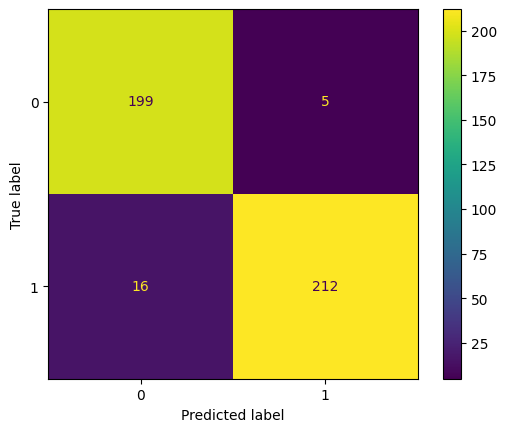

In [10]:
y_pred_KNN =KNN.predict(x_test)

print('Accuracy Score - KNN - Test-error:', metrics.accuracy_score(y_test, y_pred_KNN))  

print('\n Classification report',metrics.classification_report(y_test, y_pred_KNN))

cm = metrics.confusion_matrix(y_test, y_pred_KNN, labels=KNN.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=KNN.classes_)
disp.plot()
plt.show()